In [2]:
%pip install pandas scikit-learn gradio matplotlib seaborn


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.1.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached ffmpy-0.4.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.4.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-0.25.2-py3-none-any.whl.metadata (13 kB)
  Using cached jinja2-3.1.4-py3-none

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import gradio as gr
import matplotlib.pyplot as plt
import tempfile
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

c:\Users\migue\anaconda3\envs\nuevo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

try:
    pd.set_option('display.float_format', lambda x: '%.1f' % x) 
    df_FIC = pd.read_csv('C:/Users/migue/Music/MINTIC/mintic/modulo1/Rentabilidad_FIC.csv')
    print("La db se cargó correctamente")
    
except FileExistsError as e:
    print("Error encontrado: ",e)
    
#Cualquier otro tipo de error
except Exception as e:
    print("Error: ",e)

La db se cargó correctamente


In [5]:
# Crear una nueva columna con solo mes y año
df_FIC['FECHA_CORTE'] = pd.to_datetime(df_FIC['FECHA_CORTE'], format='%d/%m/%Y')
df_FIC['MES_AÑO'] = df_FIC['FECHA_CORTE'].dt.strftime('%m/%Y')

df_newFic = df_FIC

In [6]:
try:
    df_newFic = df_newFic.drop(columns='FECHA_CORTE')
    print("Las columnas seleccionadas se eliminaron con éxito")
except KeyError as e:
    print("Error al aliminar columnas")

Las columnas seleccionadas se eliminaron con éxito


In [7]:
# Asegúrate de que 'MES_AÑO' esté en formato datetime (si no lo está)
df_newFic['MES_AÑO'] = pd.to_datetime(df_newFic['MES_AÑO'], format='%m/%Y')

# NOTA: 
*Por Recomendacion del profe Alex, debemos crear otro analisis, en la cual se relacione el subtipo Patrimonio, fecha (mes y año), rentabilidad anual. Esto con el fin de poder encontrar una posible prediccion, dado que los modelos propuestos no funcionan por la poca correlacion entre las variables.*

*De este modo, nos centraremos en predecir la rentibilidad anual futura dependiendo del mes y subtipo entidad*

### Graficas de rentabilidad mensaul en cada año segun la entidad


FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 23 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 1 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 55 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 33 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 18 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 26 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 20 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 34 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 50 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 27 veces.
Cantidad total de bajadas de FIC BURSATILES: 287

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total de

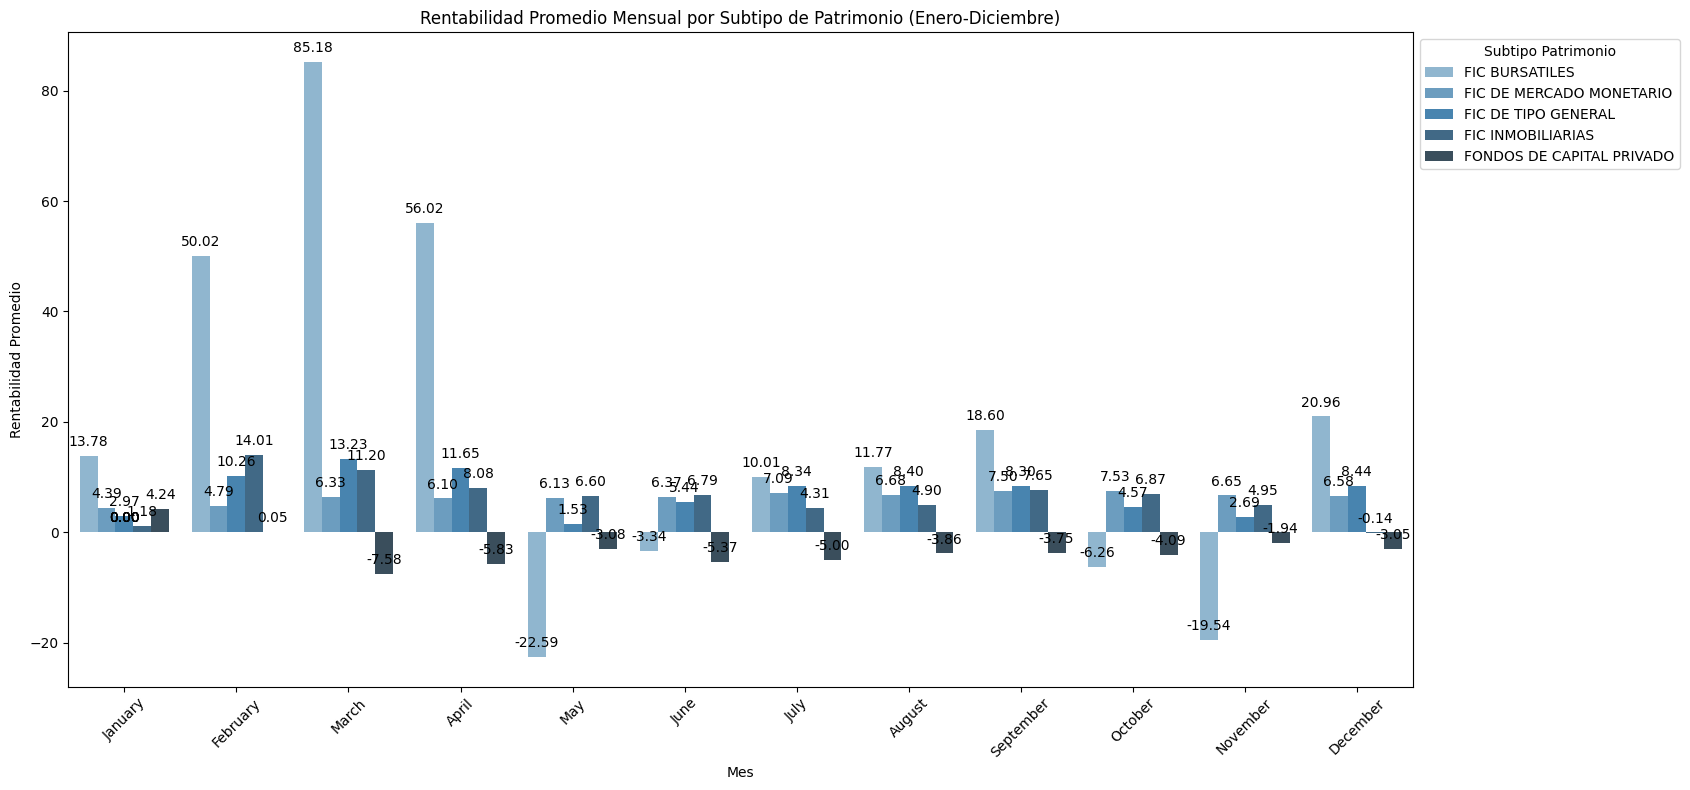

In [8]:
# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2016)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


ultimo


FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 1 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 76 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 61 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 1 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 32 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 49 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 5 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 85 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 85 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 0 veces.
Cantidad total de bajadas de FIC BURSATILES: 395

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total de 0 

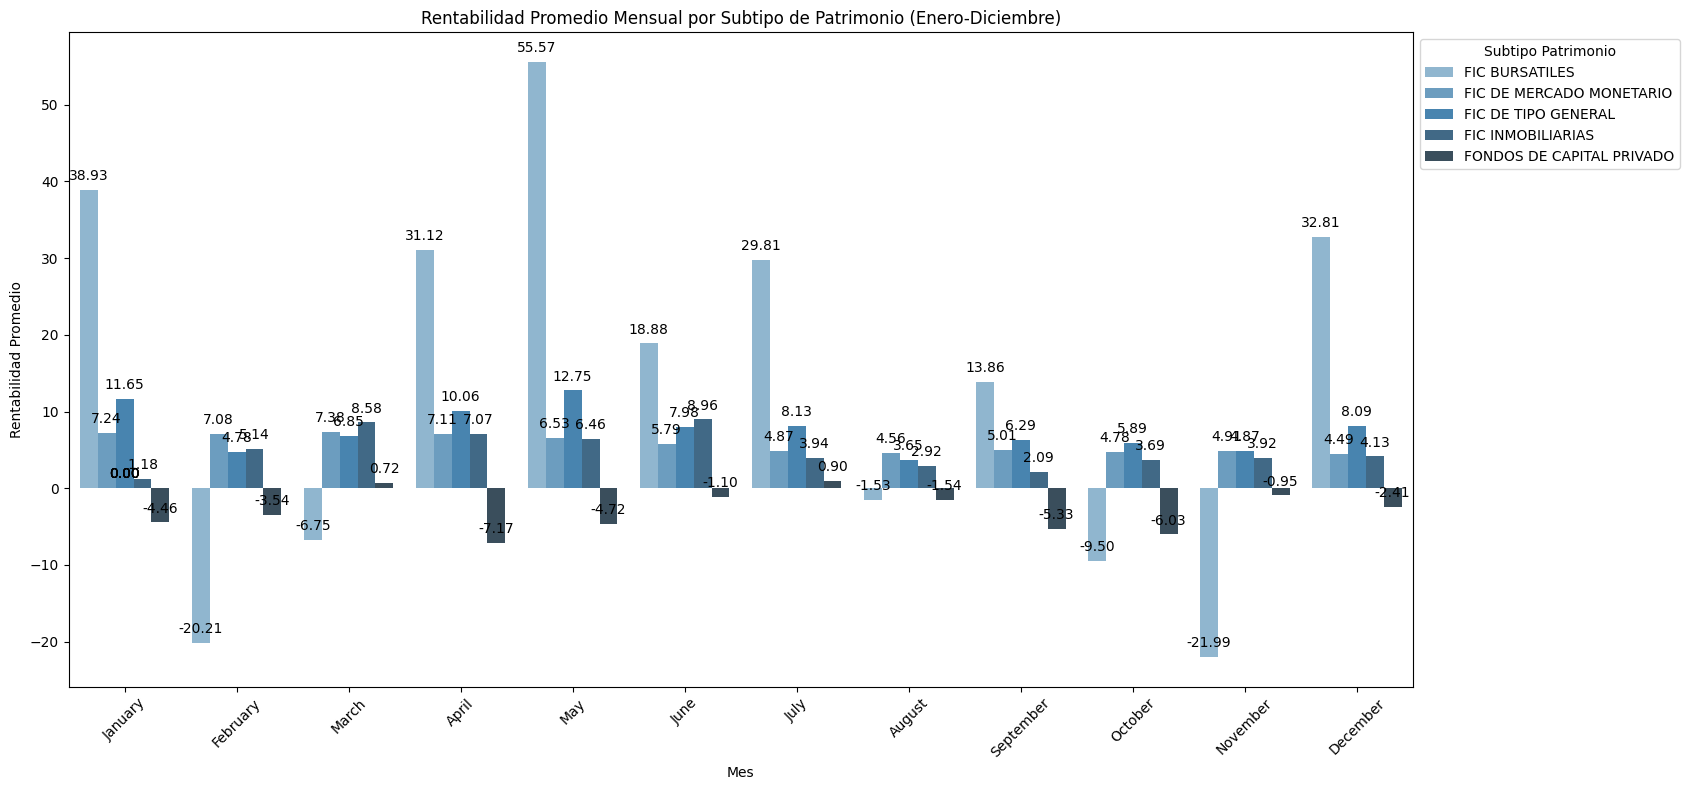

In [9]:
# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2017)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()



FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 1 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 71 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 92 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 3 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 58 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 23 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 27 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 83 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 84 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 83 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 89 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 85 veces.
Cantidad total de bajadas de FIC BURSATILES: 699

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total d

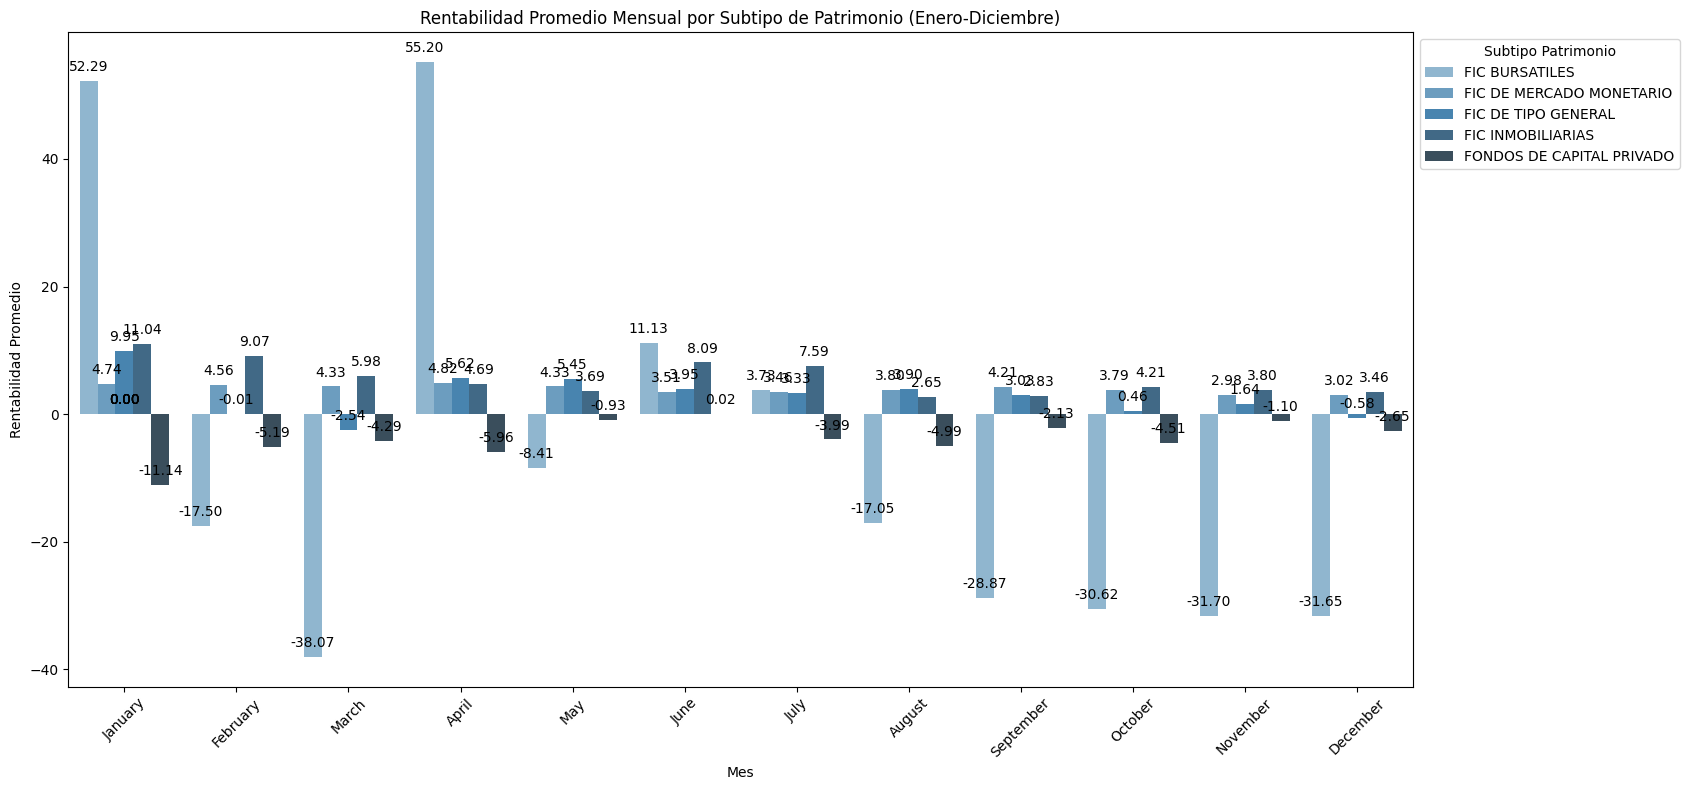

In [10]:

# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2018)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()



FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 27 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 13 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 85 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 36 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 6 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 58 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 10 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 17 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 24 veces.
Cantidad total de bajadas de FIC BURSATILES: 276

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total de 

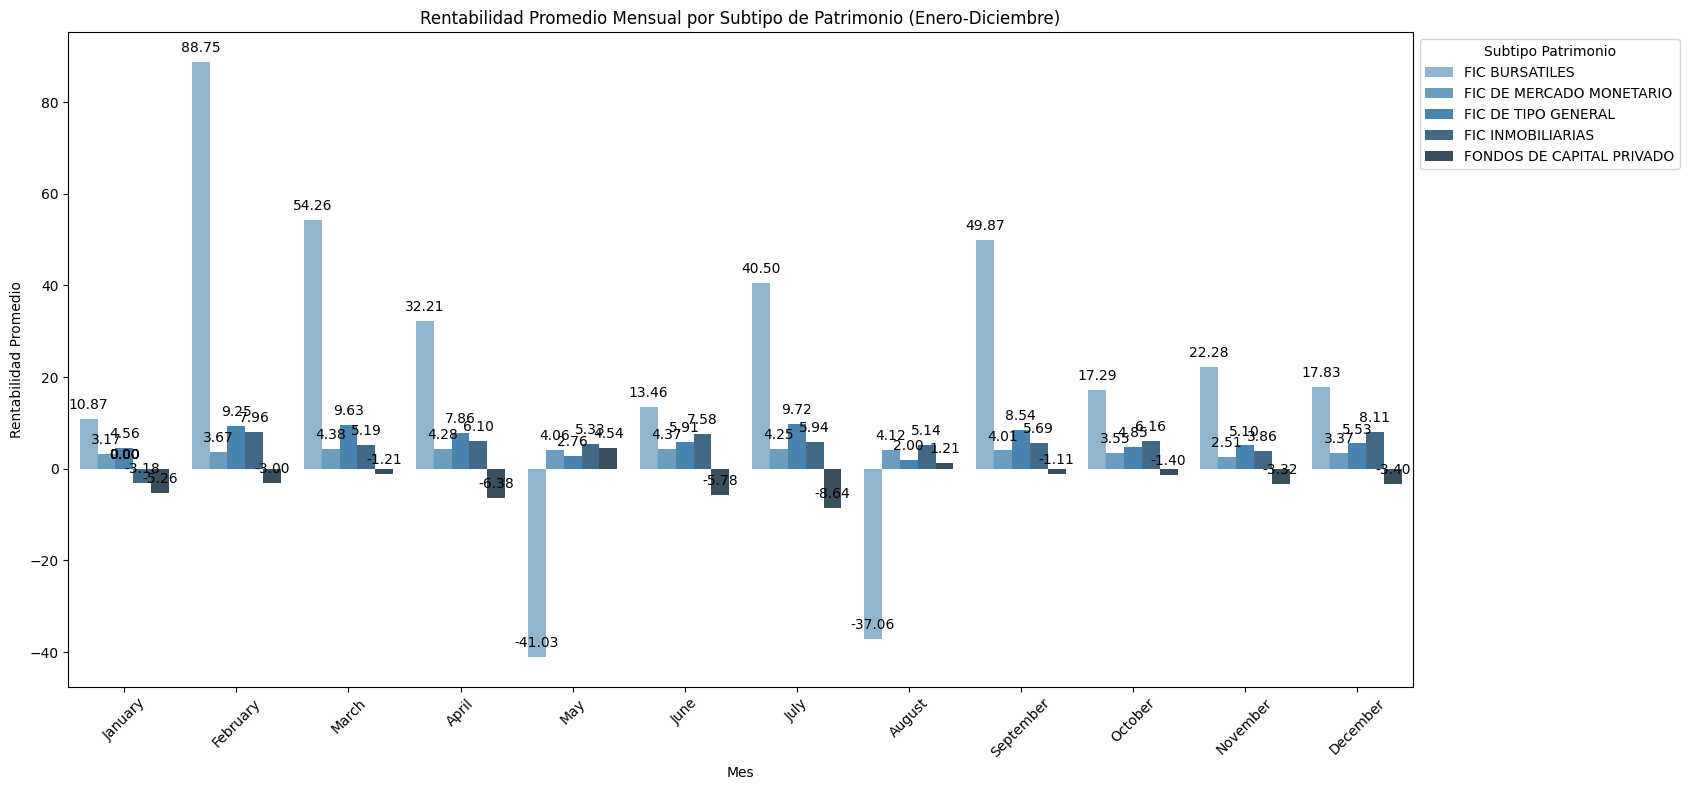

In [11]:
# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2019)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()



FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 18 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 40 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 47 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 23 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 52 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 5 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 18 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 17 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 17 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 53 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 15 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 0 veces.
Cantidad total de bajadas de FIC BURSATILES: 305

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total d

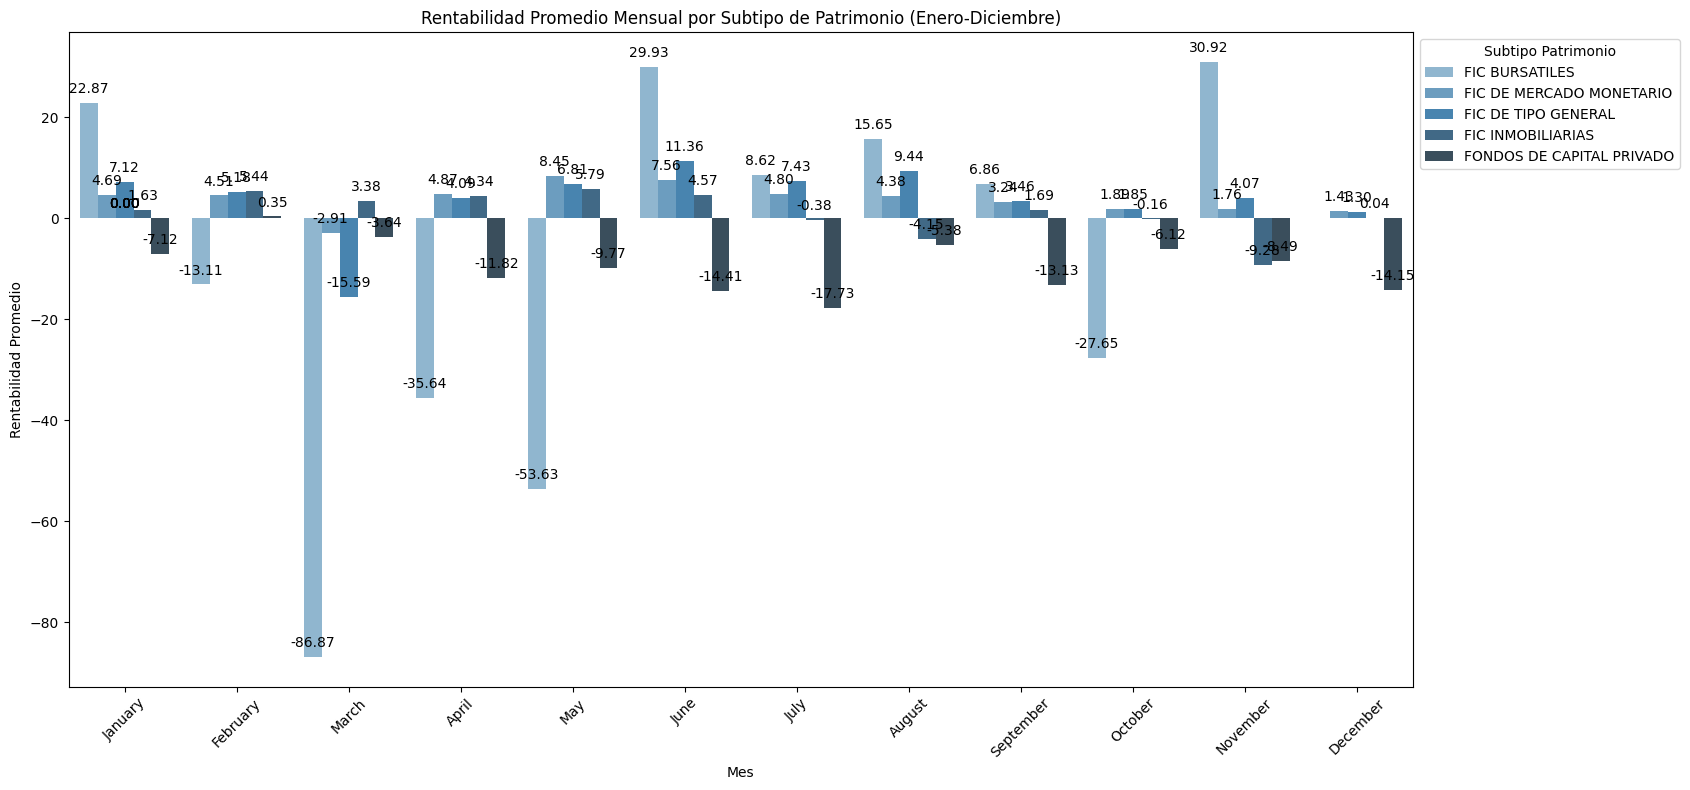

In [12]:
# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2020)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()



FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 12 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 52 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 61 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 59 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 53 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 30 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 19 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 32 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 18 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 46 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 0 veces.
Cantidad total de bajadas de FIC BURSATILES: 382

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total d

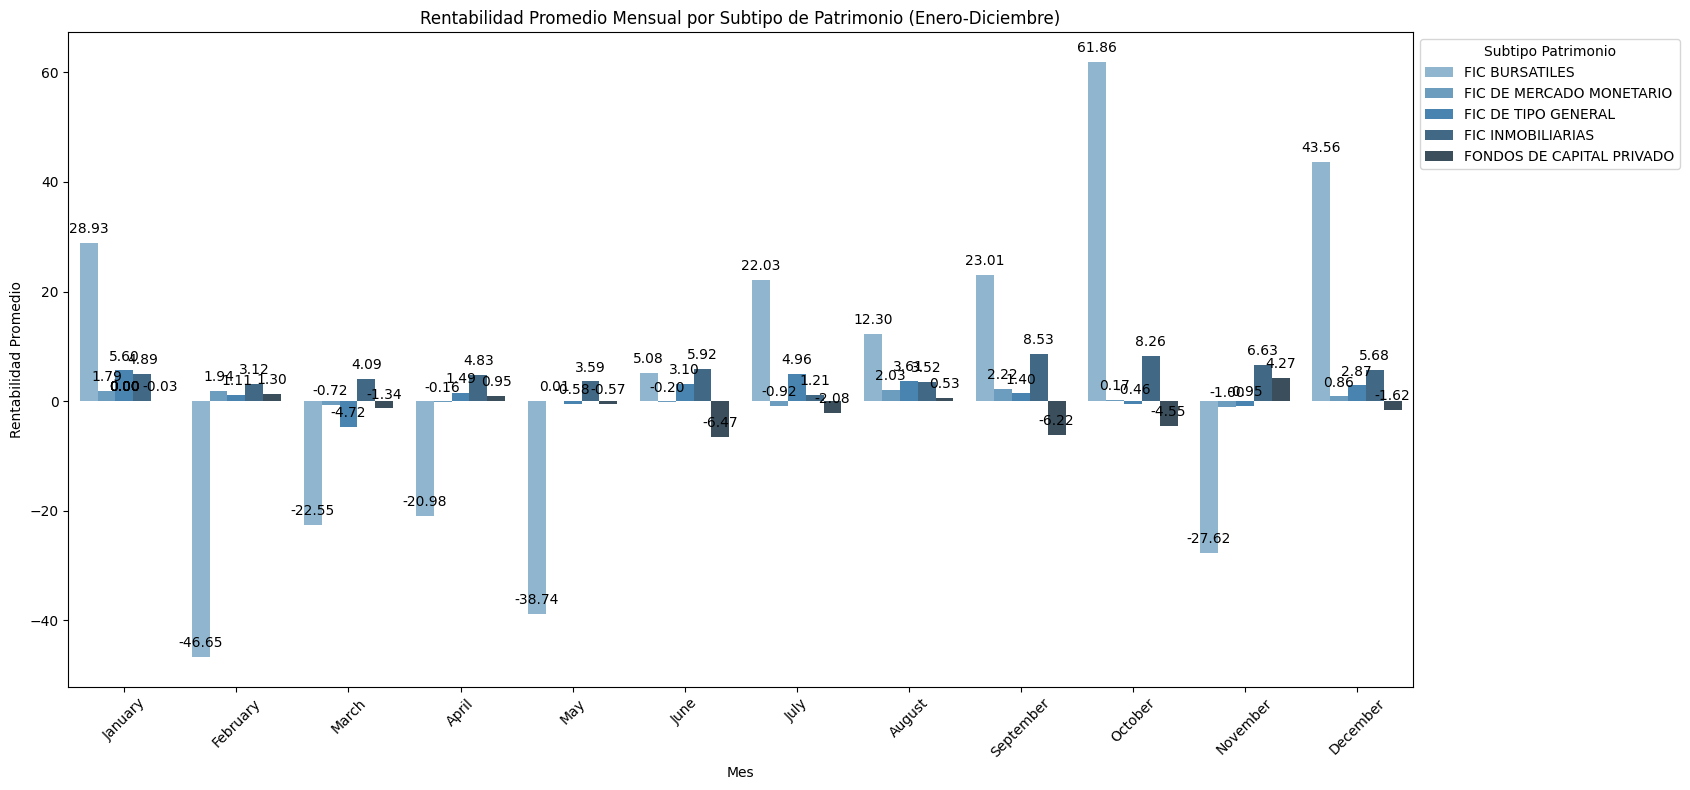

In [13]:

# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2021)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()



FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 13 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 15 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 3 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 2 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 53 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 31 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 55 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 49 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 54 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 27 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 8 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 47 veces.

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total de 0 veces.
'FIC DE MERCADO MONETARIO' bajó por deb

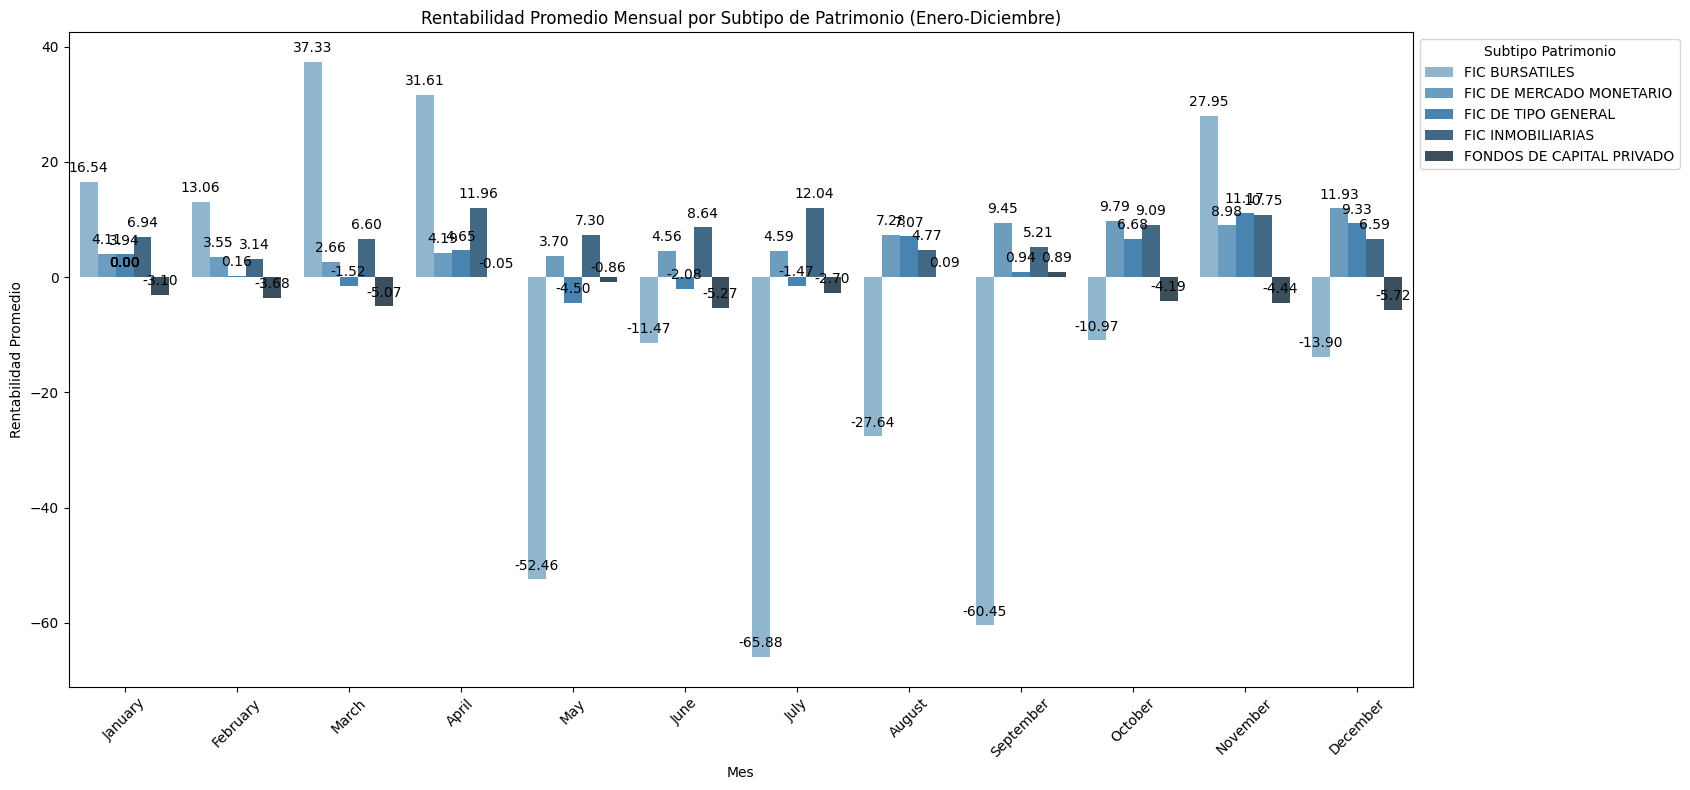

In [14]:
# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2022)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]

        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")

# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()



FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 5 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 56 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 55 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 15 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 56 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 8 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 25 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 41 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 47 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 11 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 27 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 0 veces.
Cantidad total de bajadas de FIC BURSATILES: 346

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total de

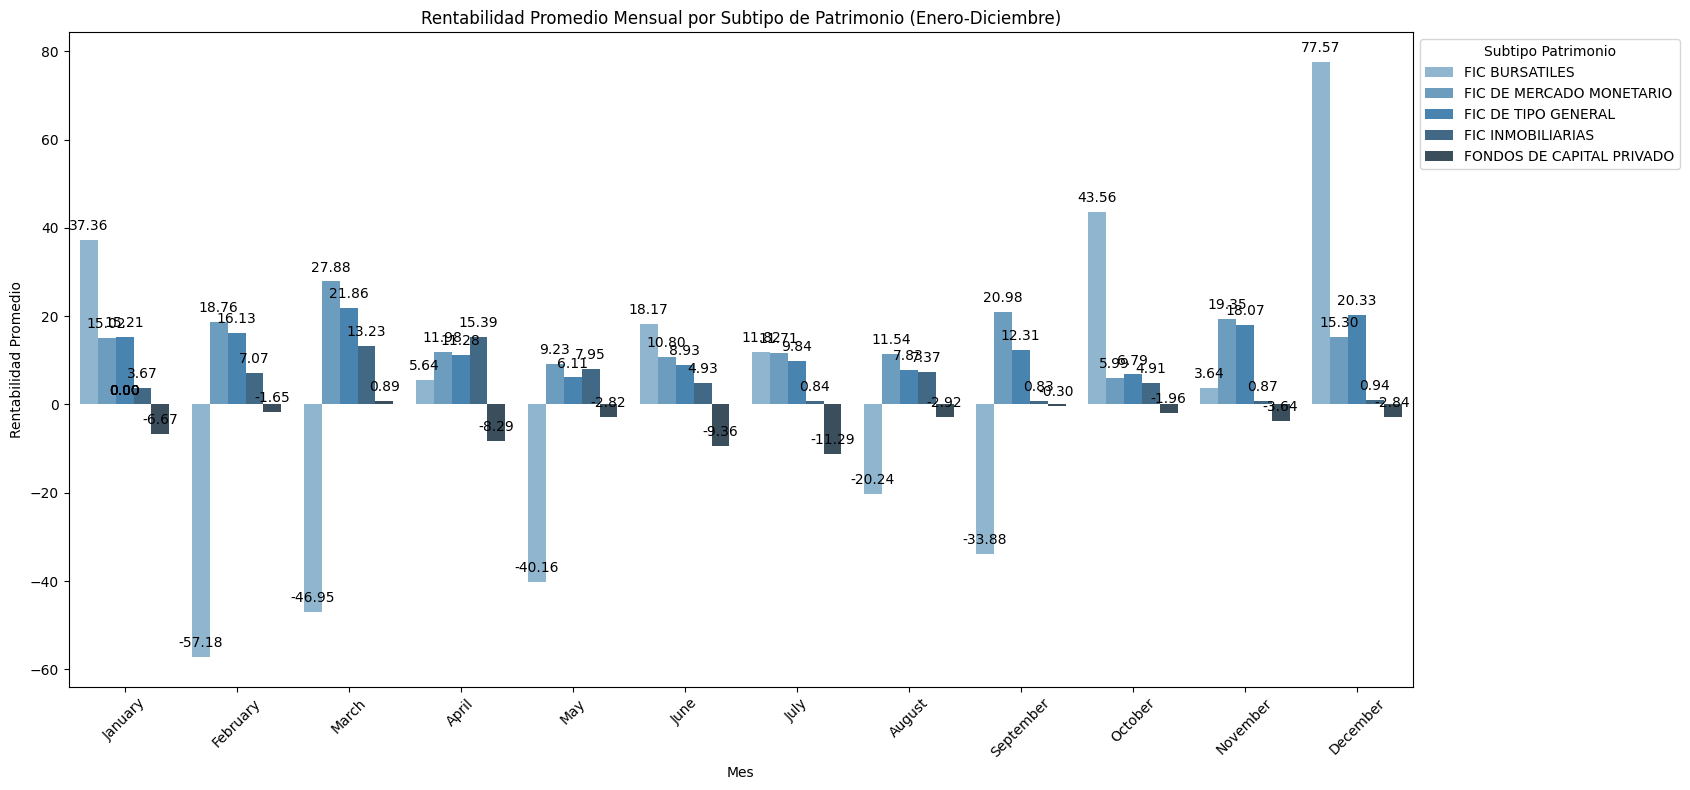

In [8]:

# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2023)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()



FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 39 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 1 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 28 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 54 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 40 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 58 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 4 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 0 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total de 0 veces.
Cantidad total de bajadas de FIC BURSATILES: 224

FIC DE MERCADO MONETARIO
'FIC DE MERCADO MONETARIO' bajó por debajo de 0 en January un total de 0 v

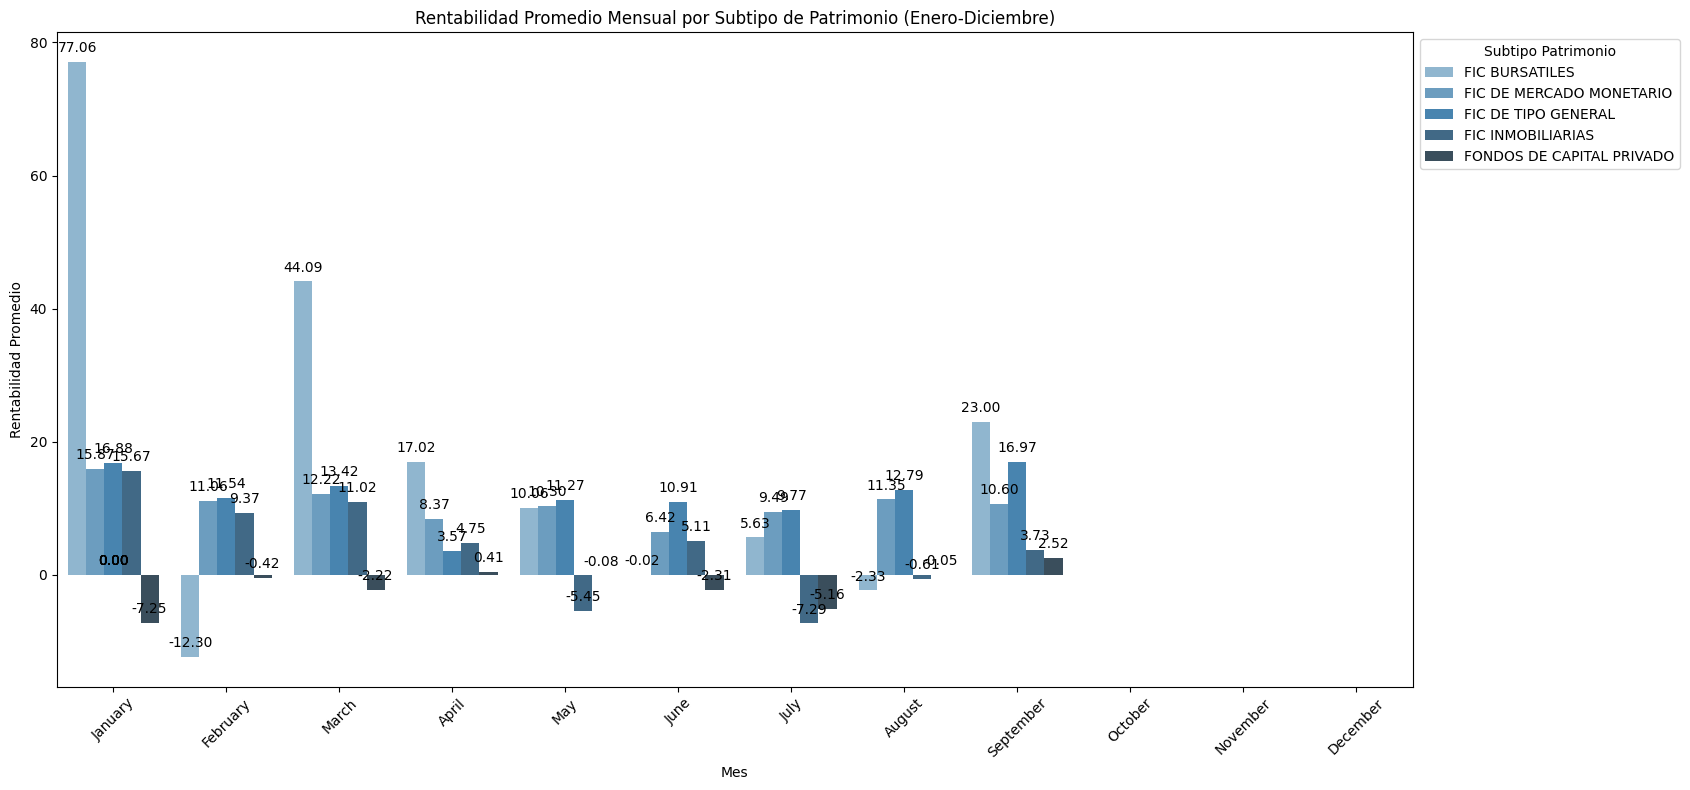

In [16]:
# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year == 2024)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    
# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


---------------------------------------------------Valores de todos los meses por debajo de 0 por entidad ------------------------------------

FIC BURSATILES
'FIC BURSATILES' bajó por debajo de 0 en January un total de 100 veces.
'FIC BURSATILES' bajó por debajo de 0 en February un total de 350 veces.
'FIC BURSATILES' bajó por debajo de 0 en March un total de 319 veces.
'FIC BURSATILES' bajó por debajo de 0 en April un total de 116 veces.
'FIC BURSATILES' bajó por debajo de 0 en May un total de 441 veces.
'FIC BURSATILES' bajó por debajo de 0 en June un total de 252 veces.
'FIC BURSATILES' bajó por debajo de 0 en July un total de 208 veces.
'FIC BURSATILES' bajó por debajo de 0 en August un total de 413 veces.
'FIC BURSATILES' bajó por debajo de 0 en September un total de 249 veces.
'FIC BURSATILES' bajó por debajo de 0 en October un total de 303 veces.
'FIC BURSATILES' bajó por debajo de 0 en November un total de 337 veces.
'FIC BURSATILES' bajó por debajo de 0 en December un total d

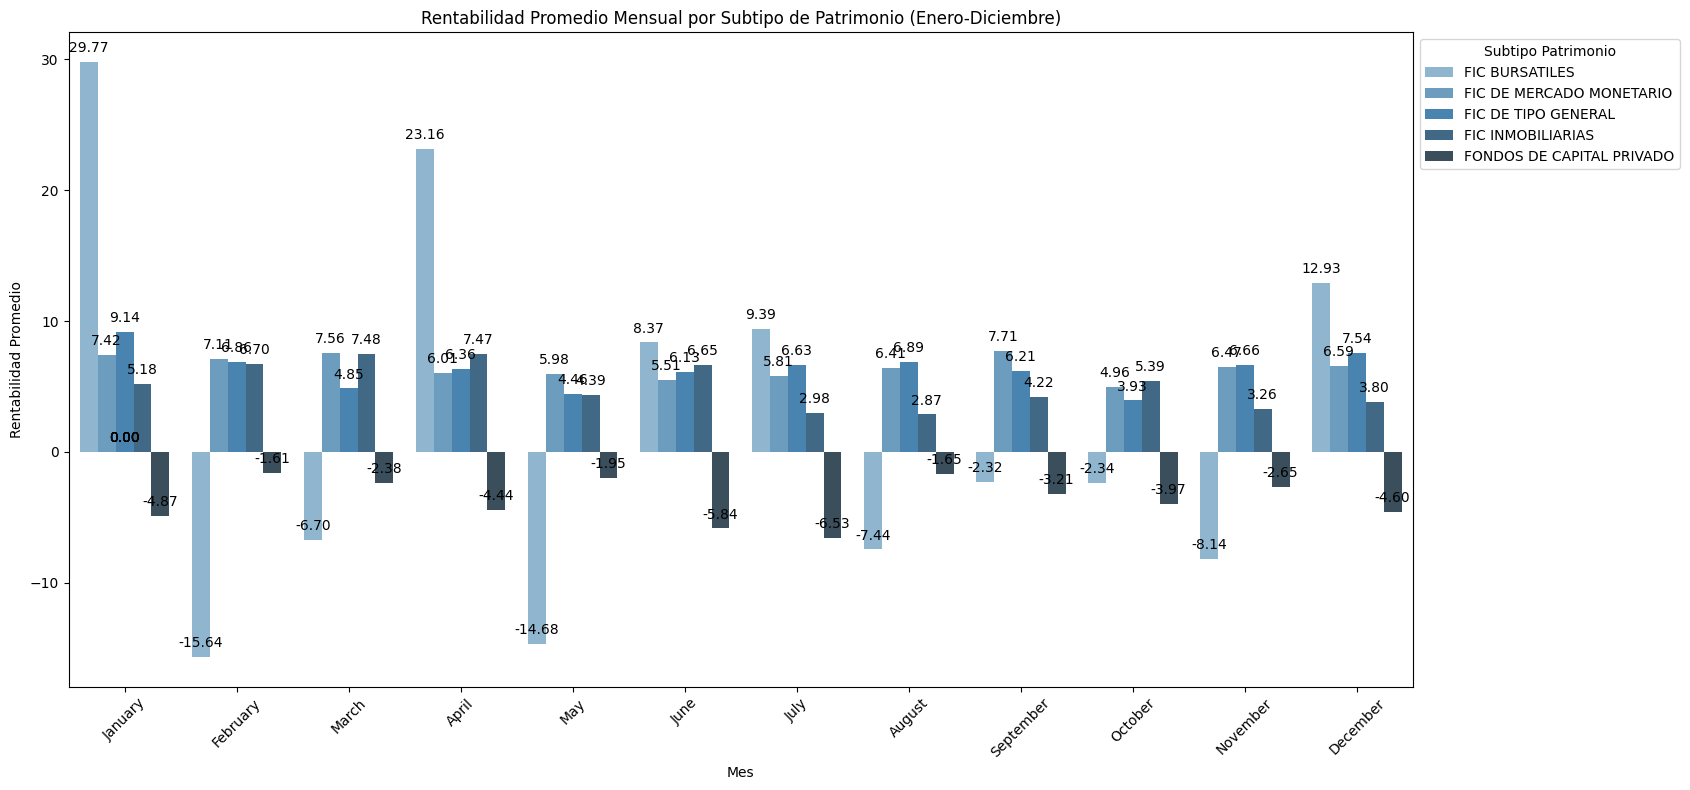

In [9]:
print("---------------------------------------------------Valores de todos los meses por debajo de 0 por entidad ------------------------------------")
# Filtrar por el año 2022
filtro_anios = (df_newFic['MES_AÑO'].dt.year >= 2016) & (df_newFic['MES_AÑO'].dt.year <= 2024)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES','FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo bajó por debajo de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n"+subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades negativas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea menor a 0
        rentabilidad_negativa_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] < 0)]

        # Contar cuántas veces ocurrió
        cantidad_bajadas_mes = rentabilidad_negativa_mes.shape[0]
        Fic_bajadaTotal += cantidad_bajadas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_bajadas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' bajó por debajo de 0 en {nombre_mes} un total de {cantidad_bajadas_mes} veces.")
    print(f'Cantidad total de bajadas de {subtipo}: {Fic_bajadaTotal}')
    

# Agrupar por NOMBRE_SUBTIPO_PATRIMONIO y MES_AÑO y calcular la rentabilidad promedio mensual por mes
rentabilidad_prom_mensual = df_filtrado_anio.groupby([df_filtrado_anio['MES_AÑO'].dt.strftime('%B'), 'NOMBRE_SUBTIPO_PATRIMONIO'])['RENTABILIDAD_MENSUAL'].mean().reset_index()

# Ordenar los meses en el orden correcto (enero, febrero, marzo, etc.)
rentabilidad_prom_mensual['MES_AÑO'] = pd.Categorical(rentabilidad_prom_mensual['MES_AÑO'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Ordenar los valores por mes y subtipo de patrimonio
rentabilidad_prom_mensual = rentabilidad_prom_mensual.sort_values(by=['MES_AÑO', 'NOMBRE_SUBTIPO_PATRIMONIO'])

# Crear la gráfica de barras segmentada por mes y NOMBRE_SUBTIPO_PATRIMONIO
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=rentabilidad_prom_mensual, x='MES_AÑO', y='RENTABILIDAD_MENSUAL', hue='NOMBRE_SUBTIPO_PATRIMONIO', palette='Blues_d')

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Títulos y etiquetas
plt.title('Rentabilidad Promedio Mensual por Subtipo de Patrimonio (Enero-Diciembre)')
plt.xlabel('Mes')
plt.ylabel('Rentabilidad Promedio')
plt.xticks(rotation=45)
plt.legend(title='Subtipo Patrimonio', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [6]:
print("---------------------------------------------------Valores de todos los meses por encima de 0 por entidad ------------------------------------")
# Filtrar por el año 2016 a 2024
filtro_anios = (df_newFic['MES_AÑO'].dt.year >= 2016) & (df_newFic['MES_AÑO'].dt.year <= 2024)
df_filtrado_anio = df_newFic[filtro_anios]

# Lista de subtipo de patrimonios a analizar
subtipos_patrimonio = ['FIC BURSATILES', 'FIC DE MERCADO MONETARIO', 'FIC INMOBILIARIAS', 'FONDOS DE CAPITAL PRIVADO', 'FIC DE TIPO GENERAL']

# Crear un diccionario para almacenar los resultados de cuántas veces cada subtipo subió por encima de 0 en cada mes
bajadas_por_subtipo_y_mes = {subtipo: {} for subtipo in subtipos_patrimonio}

# Crear un diccionario para almacenar el total de cada mes
total_por_mes = {pd.to_datetime(f'2022-{mes}-01').strftime('%B'): 0 for mes in range(1, 13)}

# Iterar sobre los subtipos de patrimonio
for subtipo in subtipos_patrimonio:
    print("\n" + subtipo)
    Fic_bajadaTotal = 0
    
    # Filtrar y contar las rentabilidades positivas por cada mes de enero a diciembre para el subtipo actual
    for mes in range(1, 13):
        # Filtrar el mes específico
        filtro_mes = df_filtrado_anio['MES_AÑO'].dt.month == mes
        df_filtrado_mes = df_filtrado_anio[filtro_mes]

        # Filtrar las filas donde 'NOMBRE_SUBTIPO_PATRIMONIO' sea el subtipo actual y 'RENTABILIDAD_MENSUAL' sea mayor a 0
        rentabilidad_positiva_mes = df_filtrado_mes[(df_filtrado_mes['NOMBRE_SUBTIPO_PATRIMONIO'] == subtipo) & (df_filtrado_mes['RENTABILIDAD_MENSUAL'] > 0)]

        # Contar cuántas veces ocurrió
        cantidad_subidas_mes = rentabilidad_positiva_mes.shape[0]
        Fic_bajadaTotal += cantidad_subidas_mes
        
        # Obtener el nombre del mes en formato texto
        nombre_mes = pd.to_datetime(f'2022-{mes}-01').strftime('%B')

        # Almacenar el resultado en el diccionario
        bajadas_por_subtipo_y_mes[subtipo][nombre_mes] = cantidad_subidas_mes

        # Sumar el total por mes
        total_por_mes[nombre_mes] += cantidad_subidas_mes

        # Mostrar el resultado para el mes actual y el subtipo actual
        print(f"'{subtipo}' subió por encima de 0 en {nombre_mes} un total de {cantidad_subidas_mes} veces.")
    print(f'Cantidad total de valores de {subtipo} por encima de 0: {Fic_bajadaTotal}')

# Mostrar el total por mes
print("\n--------------------------------------------- Totales por mes ---------------------------------------------")
for mes, total in total_por_mes.items():
    print(f"Total de veces que se subió por encima de 0 en {mes}: {total}")

    


---------------------------------------------------Valores de todos los meses por encima de 0 por entidad ------------------------------------

FIC BURSATILES
'FIC BURSATILES' subió por encima de 0 en January un total de 330 veces.
'FIC BURSATILES' subió por encima de 0 en February un total de 107 veces.
'FIC BURSATILES' subió por encima de 0 en March un total de 202 veces.
'FIC BURSATILES' subió por encima de 0 en April un total de 334 veces.
'FIC BURSATILES' subió por encima de 0 en May un total de 199 veces.
'FIC BURSATILES' subió por encima de 0 en June un total de 353 veces.
'FIC BURSATILES' subió por encima de 0 en July un total de 443 veces.
'FIC BURSATILES' subió por encima de 0 en August un total de 218 veces.
'FIC BURSATILES' subió por encima de 0 en September un total de 248 veces.
'FIC BURSATILES' subió por encima de 0 en October un total de 187 veces.
'FIC BURSATILES' subió por encima de 0 en November un total de 157 veces.
'FIC BURSATILES' subió por encima de 0 en Decembe

# ANALISIS:
## FIC BURSÁTILES: 
- **Enero**: Siempre obtiene rentabilidad positiva y es el FIC con mejor desempeño en este mes.
- **Febrero**: Experimenta fluctuaciones extremas, siendo tanto el que más sube como el que más baja.
- **Marzo**: Presenta las mayores subidas y caídas abruptas.
- **Abril**: El FIC con mayor variabilidad; aunque sus caídas no son tan pronunciadas como en otros meses, es el que más sube.
- **Mayo**: Las caídas son significativas, y las subidas no son frecuentes; sin embargo, en 2016 tuvo una subida excepcional.
- **Junio**: Mantiene un buen promedio, aunque con menor relevancia que en meses anteriores.
- **Julio**: Aunque tuvo una caída considerable, se mantiene con buenos promedios en general.
- **Agosto**: La mayor parte de los valores están por debajo de 0, y no se destaca en este mes.
- **Septiembre**: Aunque sigue siendo el FIC con el valor promedio más alto, las caídas son más pronunciadas que las subidas.
- **Octubre**: La mayoría de los valores están por debajo de 0, pero destaca con una subida significativa en un caso.
- **Noviembre**: Aunque tiene algunas subidas, las caídas son más frecuentes y relevantes.
- **Diciembre**: Subidas importantes y algunas caídas menores.

## FIC DE MERCADO MONETARIO
- **Enero**: Nunca baja a 0, aunque sus ganancias son moderadas.
- **Febrero**: Se mantiene en un promedio constante sin fluctuaciones extremas.
- **Marzo**: No destaca, pero permanece cerca de 0 cuando baja.
- **Abril**: Se mantiene por encima de 0 y solo baja marginalmente una vez.
- **Mayo**: Pelea el primer puesto como el FIC con mejor rendimiento en este mes.
- **Junio**: Nunca baja de 0, aunque no destaca particularmente.
- **Julio**: Un desempeño promedio, con una ligera caída una vez.
- **Agosto**: Se mantiene por encima de 0, destacando levemente con respecto a otros meses.
- **Septiembre**: Nunca baja y, en ocasiones, se destaca frente a los otros FIC.
- **Octubre**: Se mantiene estable, sin caídas y con valores normales.
- **Noviembre**: Mantiene valores promedio, sin bajadas significativas.
- **Diciembre**: Sostiene un comportamiento promedio y no baja de 0.

## FIC DE TIPO GENERAL
- **Enero**: Se mantiene por encima de 0, aunque con un rendimiento moderado.
- **Febrero**: No baja de 0, aunque su valor no destaca.
- **Marzo**: Sube y baja sin grandes variaciones, pero a veces es el FIC con las mayores subidas o bajadas.
- **Abril**: Mantiene un comportamiento positivo, generalmente ocupando el segundo lugar en términos de rendimiento.
- **Mayo**: No destaca demasiado y solo tiene una caída leve.
- **Junio**: Baja ligeramente por debajo de 0 una vez, sin mayores impactos.
- **Julio**: Se sale del promedio con un rendimiento relativamente bueno en comparación a otros FIC.
- **Agosto**: Nunca baja de 0 y tiene un mejor desempeño que el FIC de Mercado Monetario.
- **Septiembre**: Similar al de Mercado Monetario, mantiene un buen promedio sin bajadas.
- **Octubre**: Solo baja una vez y, aunque a veces resalta, suele ser el FIC con los valores más bajos.
- **Noviembre**: Destaca entre los otros FIC, aunque no significativamente.
- **Diciembre**: Nunca baja y muestra un desempeño destacable.

## FIC INMOBILIARIA
- **Enero**: Aunque en 2019 baja de 0, su valor promedio suele estar cerca de 0 en la mayoría de los años.
- **Febrero**: Su valor promedio nunca baja de 0, manteniéndose en un rango relativamente normal.
- **Marzo**: Nunca baja, manteniendo un comportamiento estable.
- **Abril**: Mantiene un rendimiento positivo, en ocasiones peleando por el segundo lugar.
- **Mayo**: Nunca baja de 0 y pelea por el primer lugar en cuanto al rendimiento promedio.
- **Junio**: Nunca baja de 0, pero no destaca particularmente.
- **Julio**: Mantiene un rendimiento alto en comparación con otros FIC, excepto Bursátiles.
- **Agosto**: No destaca mucho, manteniéndose en valores bajos comparado con otros FIC.
- **Septiembre**: Nunca baja de 0, pero es uno de los FIC con peor desempeño en este mes.
- **Octubre**: Se mantiene por encima de 0, aunque con un comportamiento promedio.
- **Noviembre**: No destaca, pero mantiene valores normales.
- **Diciembre**: Se destaca más que en la mayoría de los otros meses, con un comportamiento positivo.

## FIC DE FONDOS DE CAPITAL PRIVADO
- **Enero**: Su valor siempre está por debajo de 0, salvo en 2016, lo que lo hace una opción de alto riesgo en este mes.
- **Febrero**: Generalmente por debajo de 0, y cuando sube, lo hace marginalmente.
- **Marzo**: Casi siempre por debajo de 0, y cuando sube, no pasa de 0.8.
- **Abril**: Tiende a estar por debajo de 0 y, cuando sube, no supera 1.
- **Mayo**: Siempre estuvo por debajo de 0, excepto una vez que subió a 4.50, siendo la primera vez que supera 1.
- **Junio**: Siempre debajo de 0, lo que lo hace una opción poco favorable.
- **Julio**: Solo registra un valor por encima de 0 (0.9) y el resto de los meses no destaca.
- **Agosto**: Siempre por debajo de 0 y no destaca en las subidas.
- **Septiembre**: Se mantiene por debajo de 0, aunque con caídas más fuertes que en otros meses.
- **Octubre**: Siempre por debajo de 0.
- **Noviembre**: Presenta una subida significativa (9), aunque sigue siendo de alto riesgo.
- **Diciembre**: Siempre por debajo de 0, con caídas importantes.

## Conclusión General
- FIC BURSÁTILES tiene altos niveles de volatilidad, con grandes subidas y caídas.
- FIC DE MERCADO MONETARIO es una opción más estable y menos riesgosa, con pocas caídas y valores consistentes.
- FIC DE TIPO GENERAL se comporta de manera estable, aunque con pocas variaciones notables.
- FIC INMOBILIARIA es una opción estable con pocas caídas, aunque sus subidas no son impresionantes.
- FIC DE FONDOS DE CAPITAL PRIVADO es una opción riesgosa, con valores que suelen estar por debajo de 0.

In [12]:
%pip uninstall pmdarima
%pip install pmdarima --no-cache-dir


^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip freeze


In [10]:

import pmdarima as pm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Asegúrate de que los datos estén ordenados por fecha
df_bursatiles = df_newFic[df_newFic['NOMBRE_SUBTIPO_PATRIMONIO'] == 'FIC BURSATILES']
df_bursatiles = df_bursatiles.set_index('MES_AÑO')

# Crear una serie temporal con la rentabilidad anual
serie_rentabilidad_anual = df_bursatiles['RENTABILIDAD_ANUAL'].resample('A').mean()

# Separar los datos en entrenamiento y prueba
train_size = int(len(serie_rentabilidad_anual) * 0.8)
train, test = serie_rentabilidad_anual[:train_size], serie_rentabilidad_anual[train_size:]

# Ajustar el modelo SARIMA automáticamente (busca los mejores parámetros)
modelo_sarima = pm.auto_arima(train, seasonal=True, m=12, trace=True)

# Predecir para el conjunto de prueba
n_periods = len(test)
predicciones = modelo_sarima.predict(n_periods=n_periods)

# Calcular el error de las predicciones
mse = mean_squared_error(test, predicciones)
print(f"Error cuadrático medio (MSE): {mse}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Datos de entrenamiento')
plt.plot(test.index, test, label='Datos reales (prueba)')
plt.plot(test.index, predicciones, label='Predicciones SARIMA')
plt.title('Predicción de Rentabilidad Anual con SARIMA')
plt.xlabel('Año')
plt.ylabel('Rentabilidad Anual')
plt.legend()
plt.show()

# Hacer predicciones a futuro
n_futuro = 5  # Número de años a predecir
predicciones_futuro = modelo_sarima.predict(n_periods=n_futuro)

# Mostrar las predicciones futuras
print("Predicciones futuras de la Rentabilidad Anual:")
print(predicciones_futuro)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

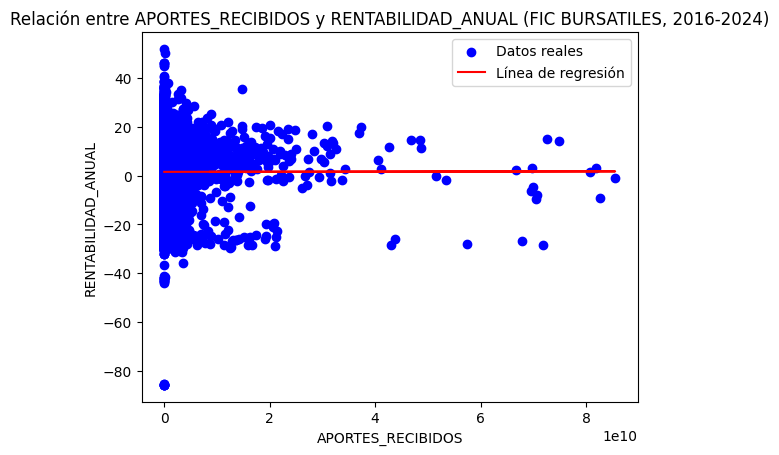

In [24]:

# Filtrar para los años 2016 hasta 2024 (todos los meses)
filtro_anios = (df_newFic['MES_AÑO'].dt.year >= 2016) & (df_newFic['MES_AÑO'].dt.year <= 2024)

filtro_fic_bursatiles = df_newFic['NOMBRE_SUBTIPO_PATRIMONIO'] == 'FIC BURSATILES'

# Aplicar los filtros
df_filtrado = df_newFic[filtro_anios & filtro_fic_bursatiles]

# Definir las variables para la regresión
X = df_filtrado[['APORTES_RECIBIDOS']].values  # Variable independiente
y = df_filtrado[['RENTABILIDAD_ANUAL']].values  # Variable dependiente

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

# Hacer predicciones basadas en los datos de X
y_pred = modelo.predict(X)

# Crear la gráfica de dispersión
plt.scatter(X, y, color='blue', label='Datos reales')

# Dibujar la línea de regresión
plt.plot(X, y_pred, color='red', label='Línea de regresión')

# Añadir etiquetas y título
plt.xlabel("APORTES_RECIBIDOS")
plt.ylabel("RENTABILIDAD_ANUAL")
plt.title("Relación entre APORTES_RECIBIDOS y RENTABILIDAD_ANUAL (FIC BURSATILES, 2016-2024)")

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
'''
    Realizamos predicciones sobre el conjunto de prueba y evaluamos el modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R cuadrado).
'''
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio", mse)
print("Coeficiente de determinación", r2)

Error cuadrático medio 201.79219078338133
Coeficiente de determinación -0.0004396721393193914


In [ ]:

# Visualizar la relación entre las variables y la línea de regresión
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title('Regresión Lineal Simple')
plt.xlabel('APORTES RECIBIDOS')
plt.ylabel('RENTABILIDAD ANUAL')
plt.show()

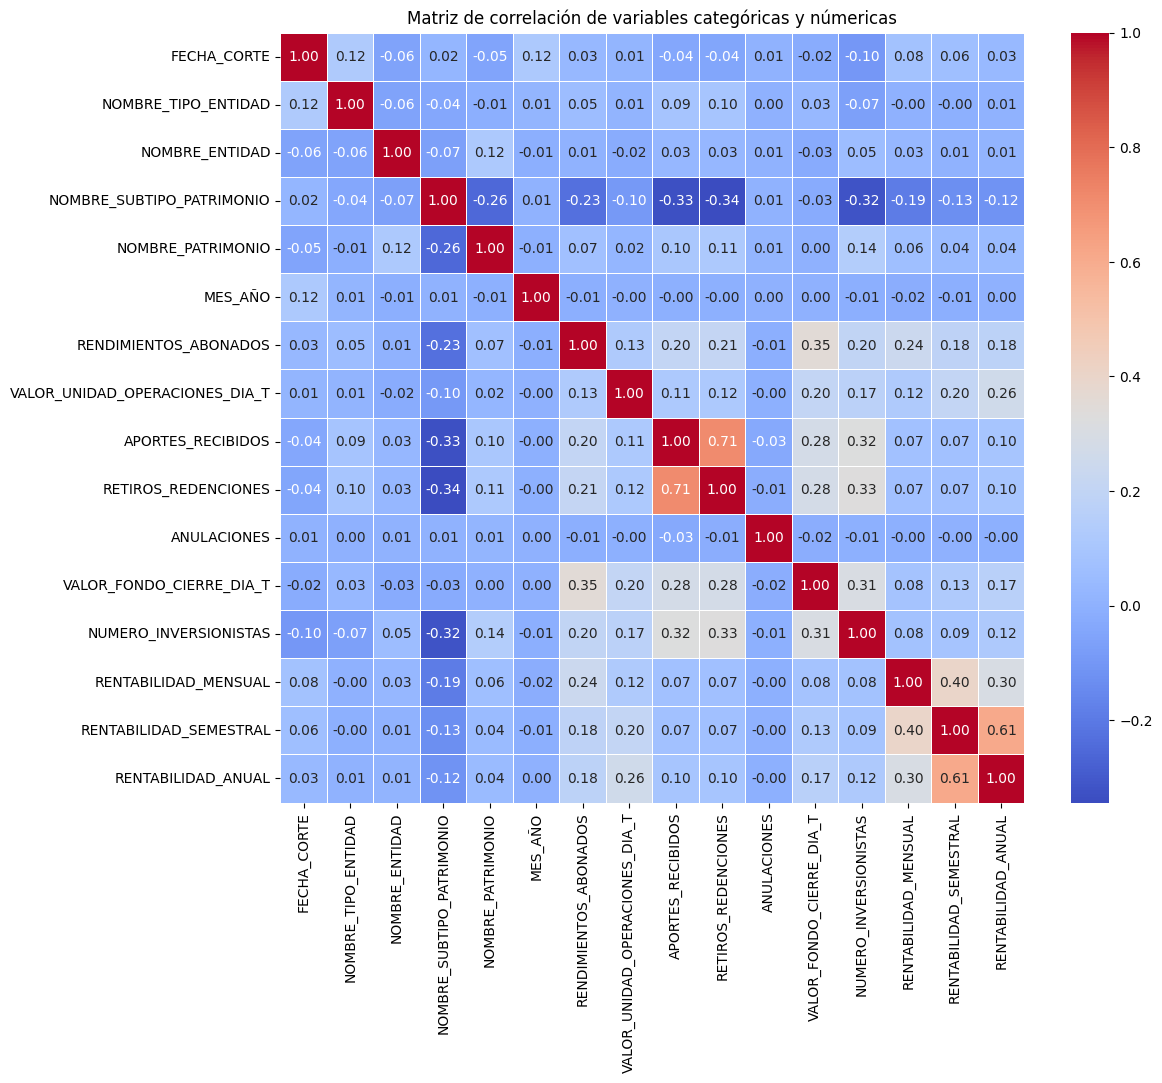

In [18]:

# Seleccionar variables categóricas
categorical_vars = ['FECHA_CORTE', 'NOMBRE_TIPO_ENTIDAD', 'NOMBRE_ENTIDAD', 
                    'NOMBRE_SUBTIPO_PATRIMONIO', 'NOMBRE_PATRIMONIO','MES_AÑO']

# Convertir todas las variables categóricas a cadenas de texto
df_FIC[categorical_vars] = df_FIC[categorical_vars].astype(str)

# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
for var in categorical_vars:
    df_FIC[var] = label_encoder.fit_transform(df_FIC[var])

# Seleccionar variables numéricas
numeric_vars = ['RENDIMIENTOS_ABONADOS', 'VALOR_UNIDAD_OPERACIONES_DIA_T', 
                'APORTES_RECIBIDOS', 'RETIROS_REDENCIONES', 'ANULACIONES',
                'VALOR_FONDO_CIERRE_DIA_T', 'NUMERO_INVERSIONISTAS', 'RENTABILIDAD_MENSUAL',
                'RENTABILIDAD_SEMESTRAL', 'RENTABILIDAD_ANUAL']

# Calcular la matriz de correlación entre variables categóricas y numéricas
correlation_matrix = df_FIC[categorical_vars + numeric_vars].corr(method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de correlación de variables categóricas y númericas')

# Mostrar el mapa de calor
plt.show()

variables independientes:
 aportes recibidos, retiros redenciones, valor unidad operaciones dia T y numero de inversionistas

variables dependientes:
rentabilidad mensual (aunque no estoy seguro), rentabilidad semestral y anual y diría que incluso valor fondo cierre dia t


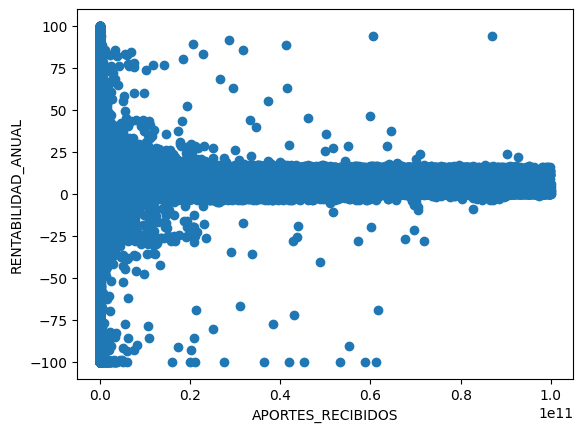

In [19]:
X = df_FIC[['APORTES_RECIBIDOS']]  # Variable independiente
y = df_FIC[['RENTABILIDAD_ANUAL']]   # Variable dependiente
plt.scatter(X, y)
plt.xlabel("APORTES_RECIBIDOS")
plt.ylabel("RENTABILIDAD_ANUAL")
plt.show()


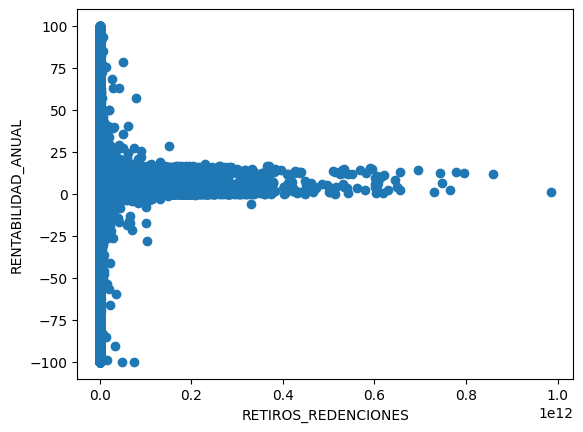

In [20]:
X = df_FIC[['RETIROS_REDENCIONES']]  # Variable independiente
y = df_FIC[['RENTABILIDAD_ANUAL']]   # Variable dependiente
plt.scatter(X, y)
plt.xlabel("RETIROS_REDENCIONES")
plt.ylabel("RENTABILIDAD_ANUAL")
plt.show()

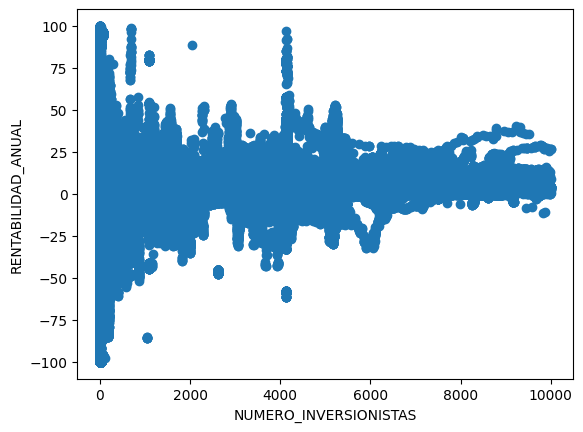

In [21]:
X = df_FIC[['NUMERO_INVERSIONISTAS']]  # Variable independiente
y = df_FIC[['RENTABILIDAD_ANUAL']]   # Variable dependiente
plt.scatter(X, y)
plt.xlabel("NUMERO_INVERSIONISTAS")
plt.ylabel("RENTABILIDAD_ANUAL")
plt.show()

In [ ]:
X = df_FIC[['RENTABILIDAD_MENSUAL']]  # Variable independiente
y = df_FIC[['RENTABILIDAD_ANUAL']]   # Variable dependiente
plt.scatter(X, y)
plt.xlabel("RENTABILIDAD_MENSUAL")
plt.ylabel("RENTABILIDAD_ANUAL")
plt.show()

# Entrenamiento

In [11]:

varX_independent = df_FIC[['APORTES_RECIBIDOS']]
varY_dependent = df_FIC[['RENTABILIDAD_ANUAL']]
X_train, X_test, y_train, y_test = train_test_split(varX_independent, varY_dependent, test_size=0.2, random_state=100)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
'''
    Realizamos predicciones sobre el conjunto de prueba y evaluamos el modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R cuadrado).
'''
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio", mse)
print("Coeficiente de determinación", r2)

Error cuadrático medio 248.85982151238744
Coeficiente de determinación 0.0013383499652019903


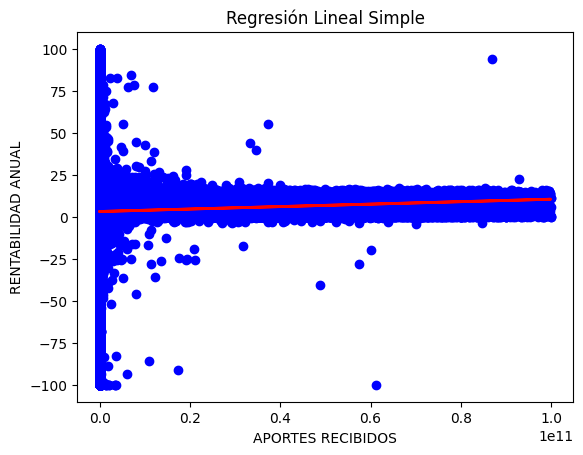

In [15]:

# Visualizar la relación entre las variables y la línea de regresión
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title('Regresión Lineal Simple')
plt.xlabel('APORTES RECIBIDOS')
plt.ylabel('RENTABILIDAD ANUAL')
plt.show()

In [22]:
varX_independent = df_FIC[['APORTES_RECIBIDOS']]
varY_dependent = df_FIC[['RETIROS_REDENCIONES']] 
X_train, X_test, y_train, y_test = train_test_split(varX_independent, varY_dependent, test_size=0.2, random_state=100)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
'''
    Realizamos predicciones sobre el conjunto de prueba y evaluamos el modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R cuadrado).
'''
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R cuadrado)
# error cuadrático medio (MSE):
    # - Métrica, para evaluar rendimiento.

# coeficiente de determinación (R cuadrado)
    # - Métrica, explicar variabilidad
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio", mse)
print("Coeficiente de determinación", r2)

Error cuadrático medio 6.992320831738917e+19
Coeficiente de determinación 0.3752544425534483


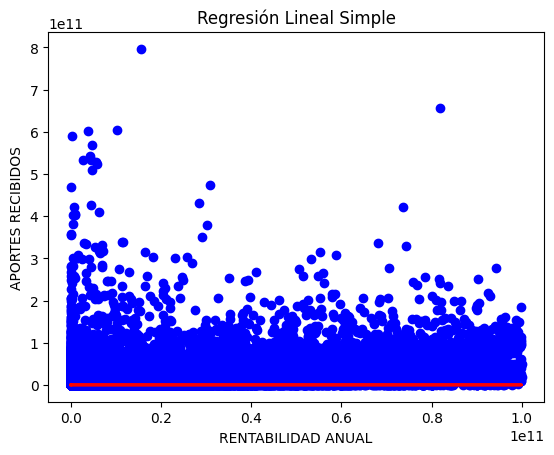

In [24]:

# Visualizar la relación entre las variables y la línea de regresión
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title('Regresión Lineal Simple')
plt.xlabel('RENTABILIDAD ANUAL')
plt.ylabel('APORTES RECIBIDOS')
plt.show()